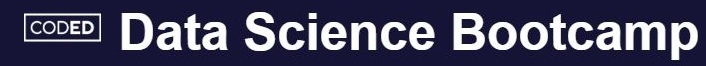

# **Task13: Underfitting and Overfitting**



*  Log In to **Your Google Account**.
*  Create a New Notebook in the Path **Coded/Phase2/Week4/Day3**.
*  Rename the Notebook to **Phase2-Week4-Day3-Task13[YourName]**.

--------------------------------------------------------------------------------

**Apply the concepts we've learned to tackle this task and discover the solution!**


**Data Preparation**
1. Read the `Titanic.csv` dataset into a DataFrame named `df_titanic`.
2. Use `head()`, `info()`, and `describe()` methods to explore`df_titanic`.
3. Check for any missing values and handle them appropriately.
**Data Visualization**
4. Create a `bar plot` to visualize the count of `survivors` (0 = No, 1 = Yes).
5. Draw a `box plot` to visualize the distribution of `ages`.
6. Generate a `heatmap` to show correlations between features.
**Specify Prediction Target**
7. Identify the target variable Survived and save this variable to a new variable called `y`.
**Specify The Features**
8. Construct the feature DataFrame `X` by selecting relevant features.
**Split Your Data**
9. Use the `train_test_split` function with specified parameters to split the data `(X, y)` into training and test sets `X_train`, `y_train`, `X_test`, and `y_test`.
**Model Training**
10. Select a range of `max_depth` values (e.g., 1, 3, 5, 7, 10,15,20).
11. For each `max_depth` value, train a `Random Forest model`.
12. Record the `training and test accuracies` for varying `max_depth` Values.
13. Create a plot of `training and test accuracies` against different `max_depth` values.
14. At which `max_depth` value do you observe signs of overfitting?
15. Based on your findings, what is the optimal `max_depth` for this dataset?





--------------------------------------------------------------------------------

* **Submit The Notebook**


#SOL

##Data Preparation

###1- Read the Titanic.csv dataset into a DataFrame named df_titanic.

In [334]:
import pandas as pd
df_titanic = pd.read_csv("/content/drive/MyDrive/Phase2/Week4/Day3/Copy of Titanic.csv")


###2- Use head(), info(), and describe() methods to exploredf_titanic.

In [335]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [336]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [337]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###3- Check for any missing values and handle them appropriately.

In [338]:
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [339]:
df_titanic = df_titanic.dropna(subset=['Age','Cabin','Embarked'])
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##Data Visualization

###4- Create a bar plot to visualize the count of survivors (0 = No, 1 = Yes).

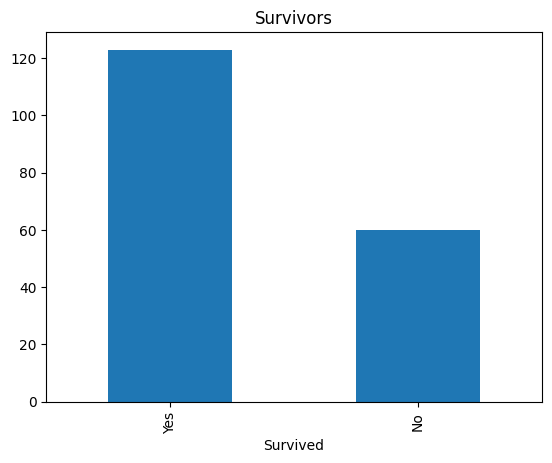

In [340]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_titanic['Survived'].replace({1: 'Yes', 0: 'No'}).value_counts().plot(kind='bar', title='Survivors')
plt.show()




###5- Draw a box plot to visualize the distribution of ages.

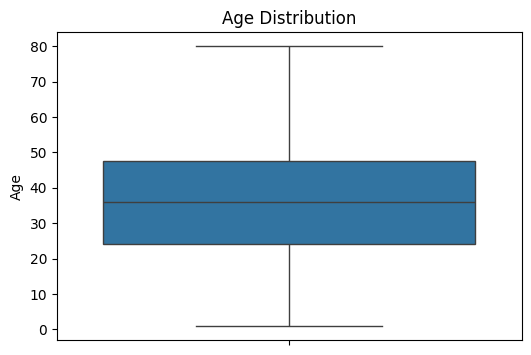

In [341]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_titanic['Age'])


plt.title('Age Distribution')
plt.show()


###6- Generate a heatmap to show correlations between features.

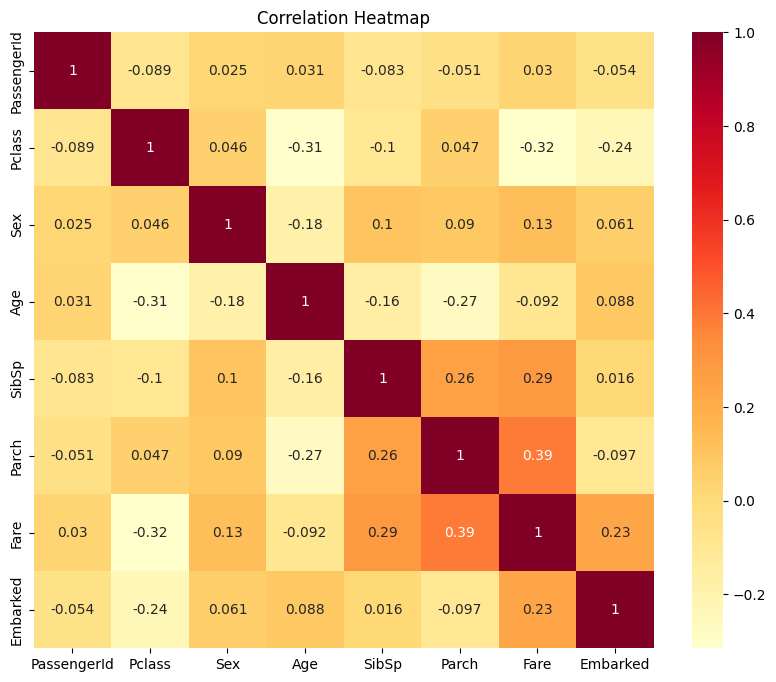

In [342]:
df_titanic = df_titanic.drop(columns=['Name', 'Ticket','Cabin'])

df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})
df_titanic['Embarked'] = df_titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

features =df_titanic.drop("Survived",axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), cmap="YlOrRd", annot=True)

plt.title('Correlation Heatmap')
plt.show()

##Specify Prediction Target

###7- Identify the target variable Survived and save this variable to a new variable called y.

In [343]:
y = df_titanic.Survived

##Specify The Features

###8- Construct the feature DataFrame X by selecting relevant features.

In [344]:
X = df_titanic.drop("Survived",axis=1) #Already droped name , ticket and cabin in heatmap

##Split Your Data

###9- Use the train_test_split function with specified parameters to split the data (X, y) into training and test sets X_train, y_train, X_test, and y_test.

In [345]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y
)

##Model Training

###10- Select a range of max_depth values (e.g., 1, 3, 5, 7, 10,15,20).

In [346]:
max_depth_settings =range(1, 15)

###11- For each max_depth value, train a Random Forest model.

In [347]:
from sklearn.ensemble import RandomForestClassifier

training_accuracy = []
test_accuracy = []

for m in max_depth_settings:
    model = RandomForestClassifier(max_depth=m, random_state=10)
    model.fit(X_train, y_train)

    # Record the training and test accuracy
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    training_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


###12- Record the training and test accuracies for varying max_depth Values.

In [348]:
print("training_accuracy:\n",training_accuracy,"\n test_accuracy:\n",test_accuracy)

training_accuracy:
 [0.7012195121951219, 0.7682926829268293, 0.8292682926829268, 0.8658536585365854, 0.9024390243902439, 0.9512195121951219, 0.975609756097561, 0.9878048780487805, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 
 test_accuracy:
 [0.6842105263157895, 0.7368421052631579, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7368421052631579, 0.7368421052631579, 0.7894736842105263, 0.7368421052631579, 0.7368421052631579]


###13- Create a plot of training and test accuracies against different max_depth values.

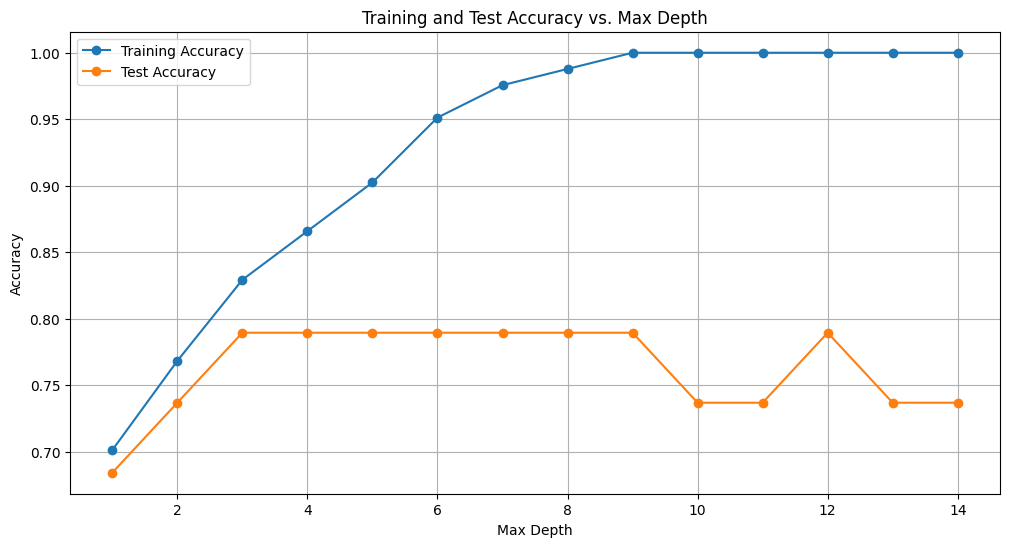

In [349]:
plt.figure(figsize=(12, 6))
plt.plot(max_depth_settings, training_accuracy, label="Training Accuracy", marker='o')
plt.plot(max_depth_settings, test_accuracy, label="Test Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy vs. Max Depth")
plt.legend()
plt.grid()
plt.show()

###14- At which max_depth value do you observe signs of overfitting?

In [350]:
#at value 10 we observe there is overfiting as the traning test is hight white test is low

###15- Based on your findings, what is the optimal max_depth for this dataset?

In [351]:
#8 is the optimal depth